# Load and read CSV file

In [1]:
import pandas as pd

In [2]:
# Read files
df = pd.read_csv('MaunaLoa.csv').reset_index(drop = True)
df.head(5)

,Year,Month,C02,C0,CH4,N20,CFC11
0,2000,1,369.76,107.36,1802.15,315.84,260.92
1,2000,2,370.28,110.35,1793.96,315.98,260.80
2,2000,3,371.00,114.45,1791.82,315.93,260.67
3,2000,4,371.95,107.21,1786.89,315.86,260.46
4,2000,5,372.05,93.18,1773.99,315.85,260.21


# Data Exploration

## Data Types and Missing Data

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [4]:
# Check data types
df.dtypes

Year       int64
Month      int64
C02      float64
C0       float64
CH4      float64
N20      float64
CFC11    float64
dtype: object

In [5]:
# Check missing values in the dataset
df.isnull().sum()

Year      0
Month     0
C02       0
C0        0
CH4       0
N20       0
CFC11    21
dtype: int64

In [6]:
df[df['CFC11'].isnull()]

,Year,Month,C02,C0,CH4,N20,CFC11
72,2006,1,381.40,103.74,1794.52,320.10,NaN
73,2006,2,382.10,97.76,1785.96,320.16,NaN
74,2006,3,383.01,104.65,1786.10,320.25,NaN
75,2006,4,384.90,117.24,1800.64,320.28,NaN
76,2006,5,385.60,108.48,1798.44,320.23,NaN
77,2006,6,384.24,83.50,1779.58,320.27,NaN
78,2006,7,382.46,66.34,1765.37,320.35,NaN
79,2006,8,380.23,63.40,1762.20,320.38,NaN
80,2006,9,378.89,70.02,1775.44,320.48,NaN
81,2006,10,379.31,79.45,1788.52,320.67,NaN


There are 21 missing values for CFC11 which belong to entire year 2006, 7 months of 2007 and 2 months of 2008, which could be due to the instrumental and operational disruptions. Otherwise, there are sufficient observations for other gases C0, C02, Ch4 and N20 

## Gas Measurement Distribution

In [7]:
# Take only gas measurements variables 
newdf = df.drop(columns=['Month', 'Year'])
newdf.head(3)

,C02,C0,CH4,N20,CFC11
0,369.76,107.36,1802.15,315.84,260.92
1,370.28,110.35,1793.96,315.98,260.80
2,371.00,114.45,1791.82,315.93,260.67


In [8]:
# Summarize data
newdf.describe()

,C02,C0,CH4,N20,CFC11
count,252.000000,252.000000,252.000000,252.000000,231.000000
mean,390.774206,90.916706,1821.885794,324.165556,240.920909
std,13.508773,15.610148,37.083250,5.340565,11.016129
min,367.010000,63.400000,1762.140000,315.840000,224.050000
25%,379.550000,78.105000,1792.947500,319.357500,230.890000
50%,389.830000,89.850000,1812.630000,323.535000,238.400000
75%,401.830000,102.895000,1854.640000,328.767500,251.765000
max,417.210000,131.180000,1905.290000,334.220000,260.920000


array([[<Axes: title={'center': 'C02'}>, <Axes: title={'center': 'C0'}>,
        <Axes: title={'center': 'CH4'}>],
       [<Axes: title={'center': 'N20'}>,
        <Axes: title={'center': 'CFC11'}>, <Axes: >]], dtype=object)

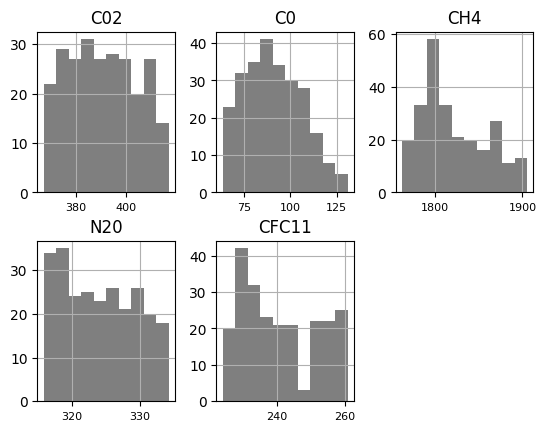

In [9]:
# Distribution of gas variables (can seperate this for better visualization and exploration)
newdf.hist(alpha = 0.5, color = 'k', bins = 10, xlabelsize=8, layout=(2,3))

<Axes: >

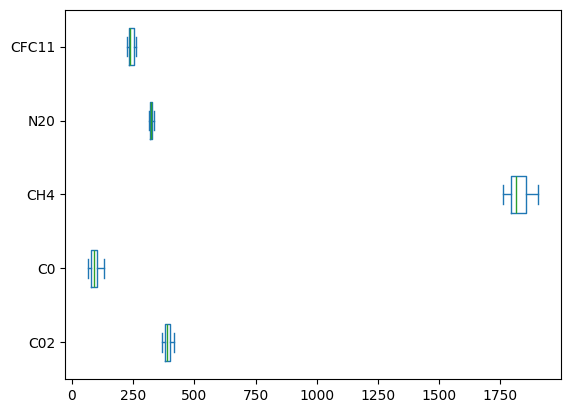

In [10]:
# Box plots
newdf.plot.box(vert = False)

From Figure 1, CO2 seem to have a somewhat symmetric distribution. Meanwhile, some right skewness and bimodal distribution can be observed for other gas variables. Moreover, 5 variables have varying values where CH4 has the highest median of 1812.63 and CO values center around the lowest median of 89.95.

On the other hand, there are no potential outliers spotted from the box plots. 

## Correlation Analysis

In [11]:
# Correlation
corr = newdf.corr()
corr.style.background_gradient(cmap = 'Blues').format(precision = 3)

,C02,C0,CH4,N20,CFC11
C02,1.000,-0.137,0.915,0.984,-0.976
C0,-0.137,1.000,0.005,-0.229,0.255
CH4,0.915,0.005,1.000,0.931,-0.889
N20,0.984,-0.229,0.931,1.000,-0.987
CFC11,-0.976,0.255,-0.889,-0.987,1.000


<Axes: >

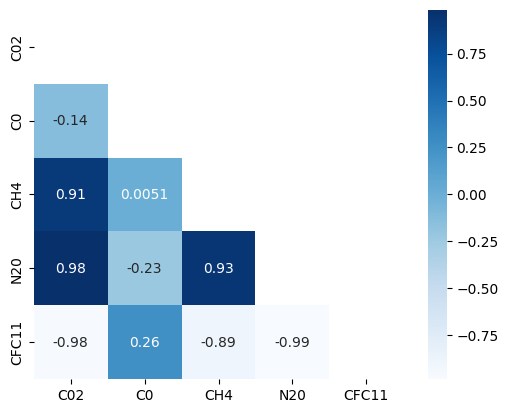

In [12]:
# Diagonal correlation matrix

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Plot Heatmap
sns.heatmap(corr, mask= mask, square=True, annot= True, cmap='Blues')

All the gas concentration measurements seem to have some relationship with each other. In particular, there exist some strong positive correlations in the dataset, between CO2 and CH4 (0.91), C02 and N20 (0.98), C02 and FC11 (-0.98), and so on, which would imply that the increase in one variable may be associated with an increase or decrease in another variable. On the other hand, C0 does not seem to strongly correlate with any other gases. 

##  Pre-Processing

Upon review, the rows containing null values of CFC 11 will be removed since there exists uncertainty regarding changes in CFC11 concentrations in those months and years. The missing data, potentially affected by operational disruptions at the Mauna Loa Observatory, contributes to this uncertainty. The natural variations in atmospheric trace gases influenced by environmental and climatic factors, make it challenging to interpolate or estimate these missing values.

Also, to maintain the consistency of the analysis within the dataset where a year fully include 12 months, all the observations of year 2006, 2007 and 2008 will be removed. Following that, the results will be interpreted in the absence of these 3 years.

In [13]:
# Remove 2006, 2007 and 2008 observations
newdf = newdf.dropna().reset_index(drop = True)

# Recheck the result
newdf.isnull().sum()

C02      0
C0       0
CH4      0
N20      0
CFC11    0
dtype: int64

<Axes: >

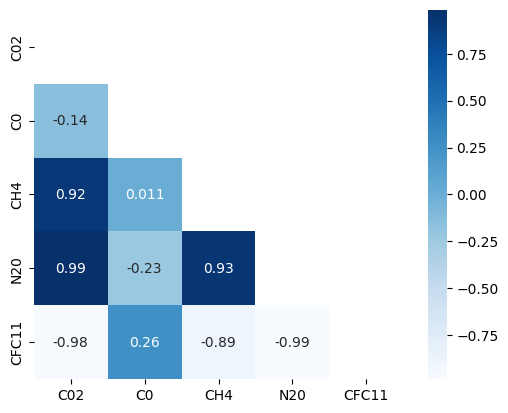

In [14]:
# Re-visualize Diagonal correlation matrix
corr1 = newdf.corr()

# Generate a mask for the upper triangle
mask1 = np.triu(np.ones_like(corr1, dtype=bool))

# Plot Heatmap
sns.heatmap(corr1, mask= mask1, square=True, annot= True, cmap='Blues')

After removing null values, there are hardly any changes in the correlation among gas concentration variables

# Dimension Reduction (Principal Components Analysis)

## Scaling data

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()

In [17]:
# Scaling data
newdf_scaled = scaler.fit_transform(newdf)

# Check shape
newdf_scaled.shape

(231, 5)

In [18]:
newdf_scaled

array([[-1.56060485,  1.13051573, -0.61444978, -1.57983169,  1.81937965],
       [-1.52314247,  1.32886003, -0.83556587, -1.55420534,  1.80846288],
       [-1.47127149,  1.60083718, -0.89334223, -1.56335761,  1.79663637],
       ...,
       [ 1.44791209, -0.46486238,  2.02139437,  1.77721952, -1.50659753],
       [ 1.52211641, -0.52589139,  2.122638  ,  1.77721952, -1.52206296],
       [ 1.6337831 , -0.31361655,  2.17015501,  1.78454134, -1.5347992 ]])

## Perform PCA

In [19]:
# Install pca library
#!pip install pca

In [20]:
from pca import pca

In [21]:
# Initialize pca with default parameters
model = pca(normalize=True)

In [22]:
# Get the feature name
col_labels = newdf.columns

# Fit transform
newdf_results = model.fit_transform(newdf_scaled, col_labels=col_labels)

[pca] >Row labels are auto-completed.
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [5] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [2] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [5] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


In [23]:
# See the results
newdf_results

{'loadings':           C02        C0       CH4       N20     CFC11
 PC1  0.501370 -0.107364  0.478807  0.507014 -0.500781
 PC2  0.064342  0.969685  0.228333 -0.019224  0.055375,
 'PC':           PC1       PC2
 0   -2.910127  0.986651
 1   -3.000052  1.129808
 2   -3.029627  1.383206
 3   -3.004409  0.890695
 4   -3.057171 -0.092068
 ..        ...       ...
 226  3.144594 -0.912395
 227  3.229387 -0.285166
 228  3.399258 -0.013651
 229  3.499235 -0.045794
 230  3.565273  0.177234
 
 [231 rows x 2 columns],
 'explained_var': array([0.77601034, 0.9784912 , 0.99602433, 0.99943105, 1.        ]),
 'variance_ratio': array([7.76010339e-01, 2.02480858e-01, 1.75331320e-02, 3.40672266e-03,
        5.68947814e-04]),
 'model': PCA(n_components=2),
 'scaler': StandardScaler(),
 'pcp': 0.996024329526403,
 'topfeat':     PC feature   loading  type
 0  PC1     N20  0.507014  best
 1  PC2      C0  0.969685  best
 2  PC1     C02  0.501370  weak
 3  PC1     CH4  0.478807  weak
 4  PC1   CFC11 -0.500781  w

(<Figure size 1200x1000 with 1 Axes>,
 <Axes: title={'center': 'Cumulative Explained Variance'}, xlabel='Principal Component', ylabel='Percentage explained variance'>)

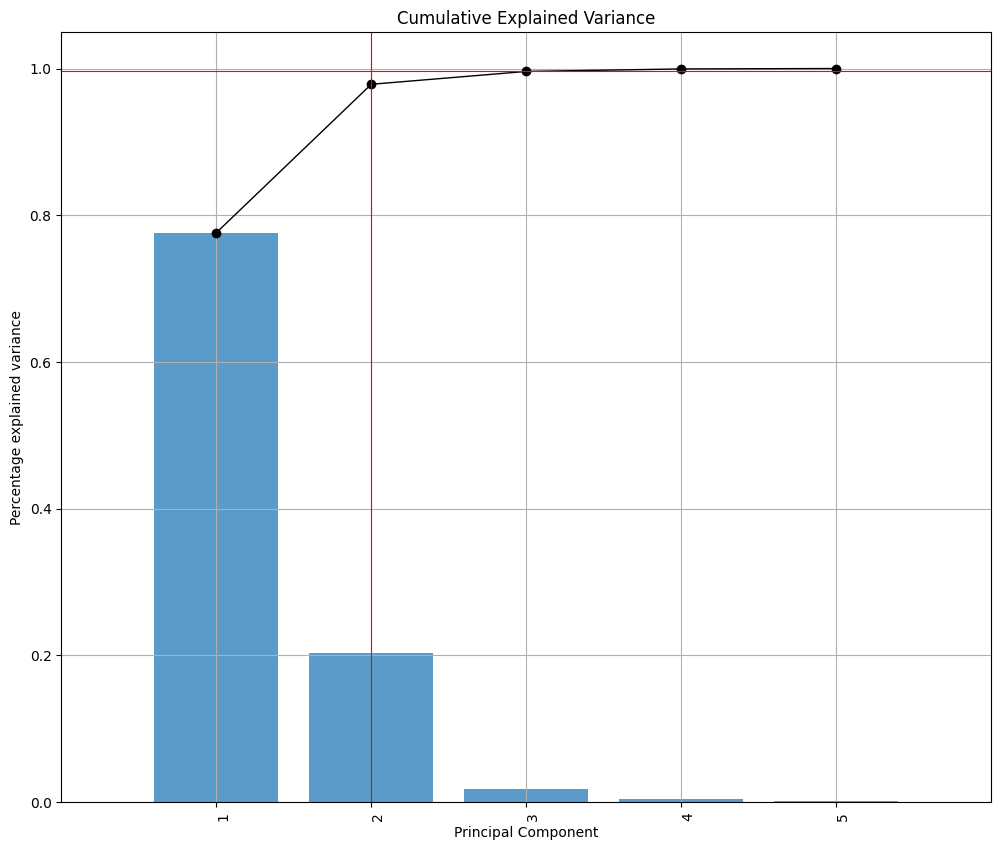

In [24]:
# Plot the explained variance
model.plot(title='Cumulative Explained Variance', figsize=(12,10))

The first principal component PC1 accounts for a substantial proportion of variance (77.6%), and PC2 takes up about 20% of it. Together, these components account for 97.8% of the total variance in the dataset. Therefore, reducing data dimension to 2 principal components is sufficient since they preserve the majority of the information contained in the original features and keeping more components may not add significant information.

[scatterd] >INFO> Create scatterplot


[pca] >Plot PC1 vs PC2 with loadings.
[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.


(<Figure size 2000x1000 with 1 Axes>,
 <Axes: title={'center': '2 Principal Components explain [99.60%] of the variance'}, xlabel='PC1 (77.6% expl.var)', ylabel='PC2 (20.2% expl.var)'>)

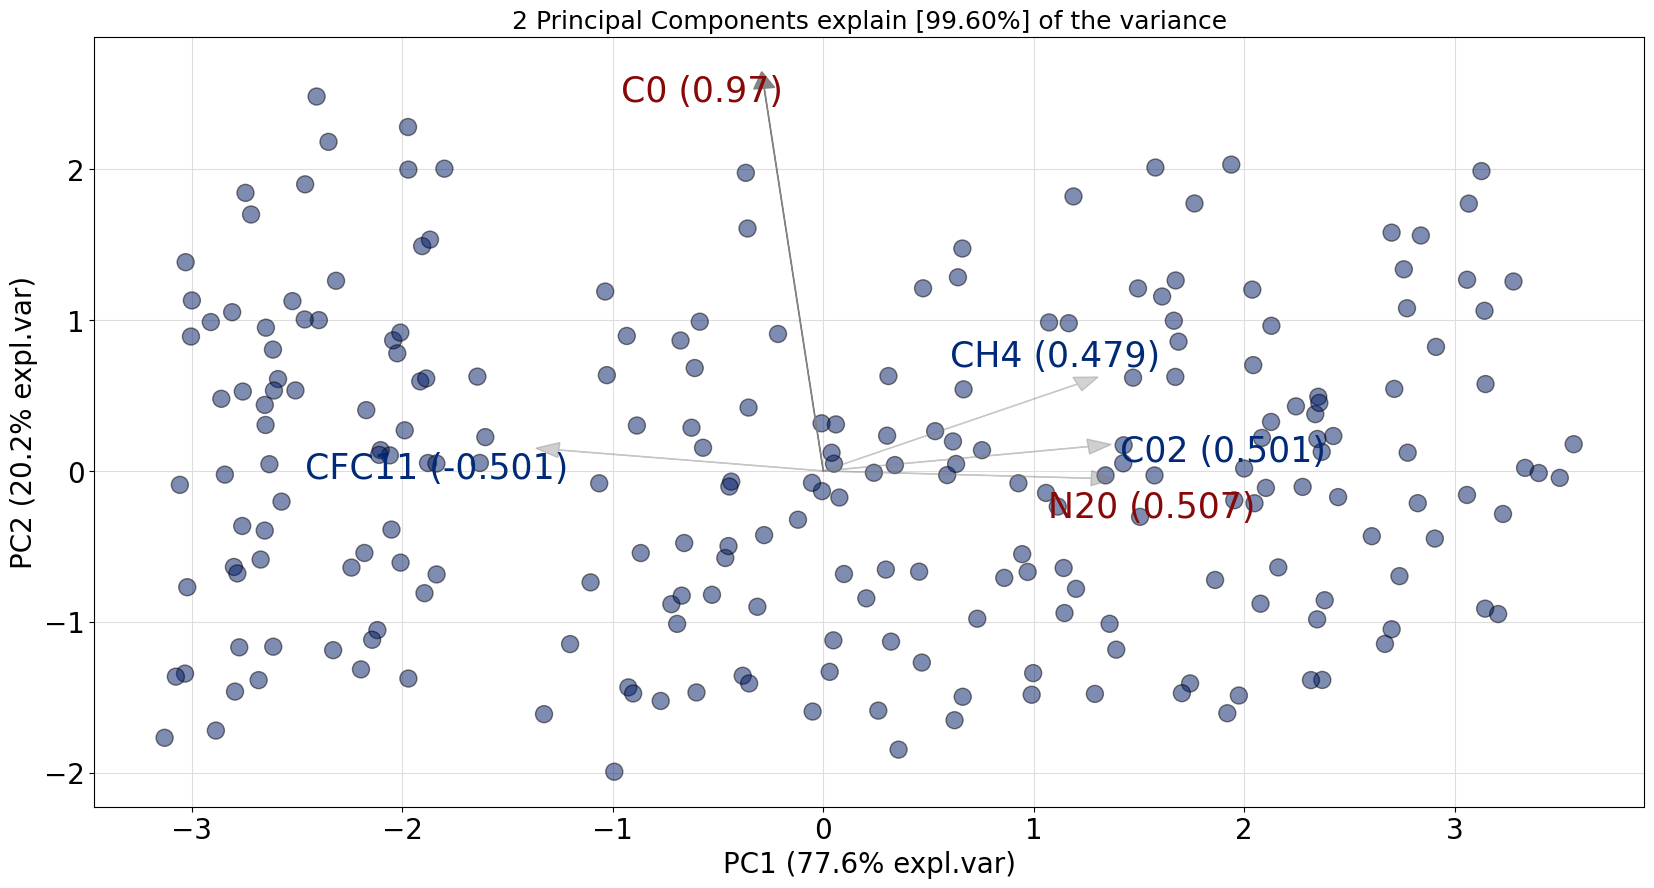

In [25]:
# PCA Biplot
model.biplot(alpha=0.5, fontsize= 25, color_arrow='grey', figsize= (20,10))

The PCA Biplot can visualize the relationship between the original features and new variables (principal components). In the biplot, the length of the four vectors N20, CO2, CH4, and CFC11 are quite similar but N20 is the longest one, which implies that it explains the majority of variance in PC1. These four variables contribute most to PC1, while CO is the prominent contributor to PC2.

## PCA Interpretation

CO2, CH4, and N20 have positive loadings on PC1. This may suggest that an observation with a high score 
on PC1 is likely to have high concentration measurements of all these 3 gases. By contrast, CFC11 has a negative 
loading on PC1 meaning that samples with high scores on PC1 tend to have low concentration of CFC11 and vice 
versa. Since CO2, CH4, and N20 are greenhouse gases, PC1 may represent a general trend of greenhouse 
gas emissions given the removal of CFCs in favor of substances with less ozone-depleting potential, where the gas 
measurements tend to vary across samples and each sample corresponds to a month in each year. On the other 
hand, CO does not make a significant impact on PC1 but still has a slight inverse relationship with other greenhouse 
gases.

In terms of PC2, CO stands out with a very strong loading on PC2, suggesting that PC2 primarily captures the variation 
in CO levels across the dataset. A high score on PC2 corresponds to a high CO concentration measure and vice versa. 
While CO is also a greenhouse gas, PC2 may reflect another dimension of the dataset that is mainly related to 
industrial processes, vehicle emissions, or other combustion-related factors that are different from other greenhouse 
gases